# Import Libraries

In [2]:
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os

# Reading Data

In [3]:
df = pd.read_excel(r"C:\Users\Snigdha\New folder\Studies\Intern-Box\Notes\Tasks\t2.xlsx")

# Analzing Data

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# Plots

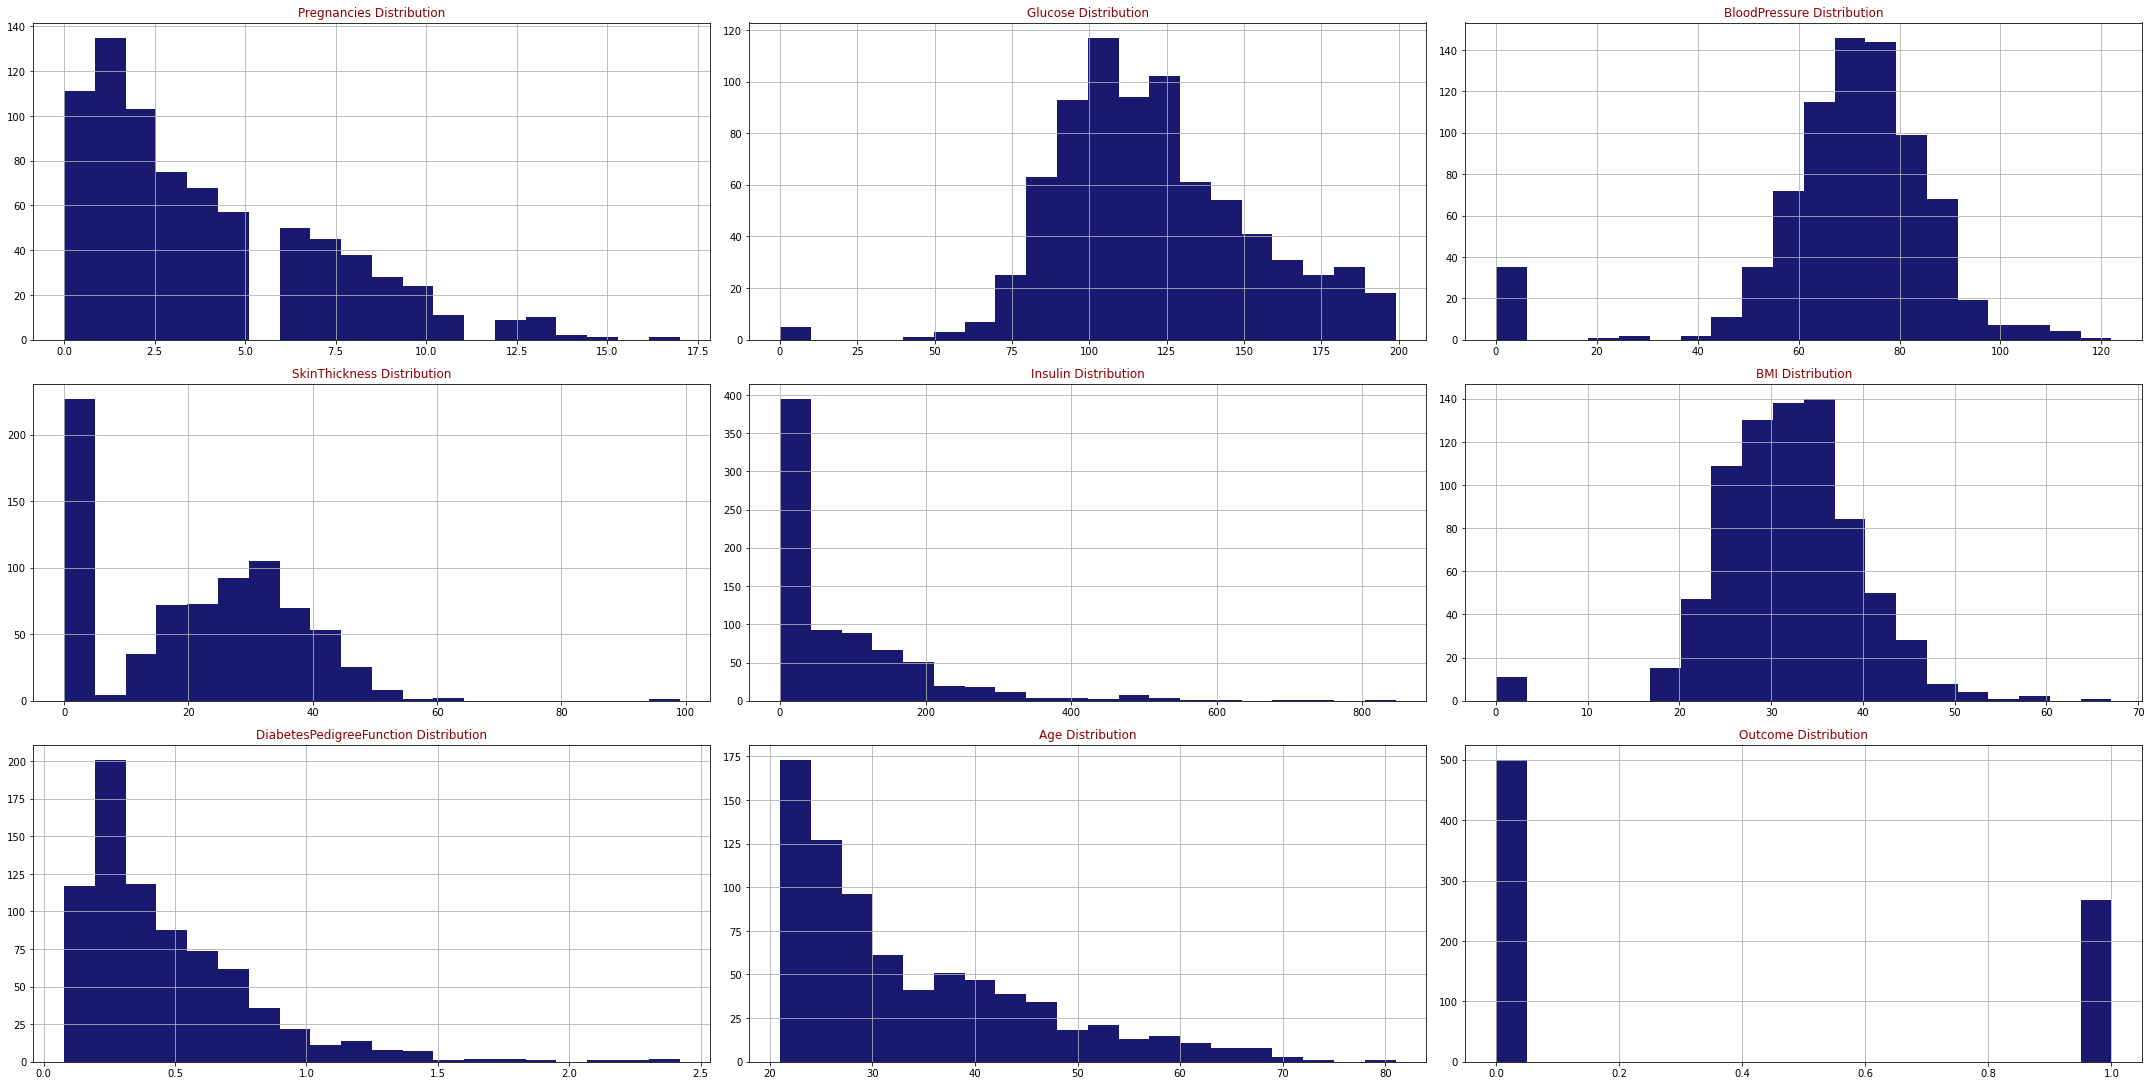

In [8]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(30,30))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

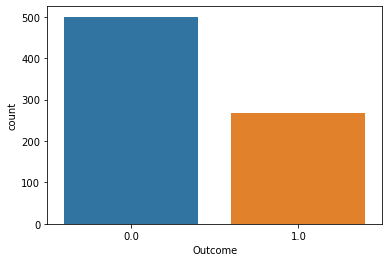

In [9]:
sns.countplot(x='Outcome',data=df)

# Defining Columns

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Defining Y and X

In [11]:
y = df['Outcome']

In [12]:
X = df.drop('Outcome',axis=1)

# Splitting data into test and train

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

# Selecting and training the model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, log_loss,roc_auc_score,confusion_matrix



In [5]:
model = LogisticRegression()


In [16]:
model.fit(X_train, y_train)


c:\Users\Snigdha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = model.predict(X_test)



# Accuracy

In [18]:
print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.7995


# Precision

In [19]:
precision = precision_score(y_test, y_pred, average='weighted')
print('Precision:', precision)

Precision: 0.7972254345388281


# Recall

In [20]:
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall:', recall)

Recall: 0.7994791666666666


# ROC curve

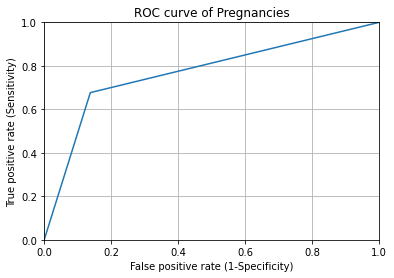

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve of Pregnancies')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

# Confusion matrix

<AxesSubplot:>

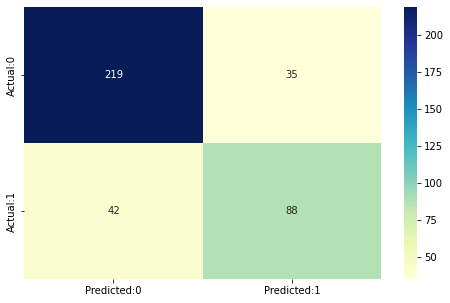

In [22]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [23]:
import pickle

In [26]:
filename = 'C:\\Users\\Snigdha\\New folder\\Studies\\Intern-Box\\Notes\\Tasks\\DEPLOY\\trainedmodel.sav'
pickle.dump(model, open(filename, 'wb'))


In [212]:
with open('model_pickle','rb') as f:
    modelpredict = pickle.load(f)
    

In [213]:
input_data = (6,148,72,35,0,33.6,0.627,50)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
predict = modelpredict.predict(input_data_reshaped)
print(predict)
    



[1.]


C:\Users\Snigdha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [214]:

if (predict[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is diabetic


In [215]:
import streamlit as st

In [216]:
def main():
    
    
    # giving a title
    st.title('Diabetes Prediction Web App')

In [217]:
# giving a title
st.title('Diabetes Prediction Web App')

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [218]:
 # getting the input data from the user
    
    
Pregnancies = st.text_input('Number of Pregnancies')
Glucose = st.text_input('Glucose Level')
BloodPressure = st.text_input('Blood Pressure value')
SkinThickness = st.text_input('Skin Thickness value')
Insulin = st.text_input('Insulin Level')
BMI = st.text_input('BMI value')
DiabetesPedigreeFunction = st.text_input('Diabetes Pedigree Function value')
Age = st.text_input('Age of the Person')
    

In [219]:
# code for Prediction
diagnosis = ''

In [220]:
# creating a button for Prediction
    
if st.button('Diabetes Test Result'):
    diagnosis = ([Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age])
        
        
    st.success(diagnosis)


In [221]:
if __name__ == '__main__':
    main()
    